In [79]:
# Importing important packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [80]:
#read csv file

dataset = pd.read_csv('E:\\Mukul\\Titanic\\train.csv')
test_data = pd.read_csv('E:\\Mukul\\Titanic\\test.csv')

In [81]:
# Checking the Null Values in Dataset and count them

dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [82]:
# In order the learn and predict the survived passengers some features plays more important role then others. These features
# are Pclass(Class of the Passenger), Age(age of passenger), Sex(Gender of passenger), Embarked. So we have to preprocess these 
# features in order the make them suitable of calculations but before that we need to visualise them that whether these features
# are important or not

# Feature Visualisation 

# Pclass vs Survived

survived = dataset[dataset['Survived']==1]['Pclass'].value_counts()
died = dataset[dataset['Survived']==0]['Pclass'].value_counts()

print('Survived', survived, 'Died', died, sep='\n')


Survived
1    136
3    119
2     87
Name: Pclass, dtype: int64
Died
3    372
2     97
1     80
Name: Pclass, dtype: int64


Percentage of Class 1 survived: 63.0 %
Percentage of Class 2 survived: 47.0 %
Percentage of Class 3 survived: 24.0 %


,1,2,3
Survived,136,87,119
Died,80,97,372


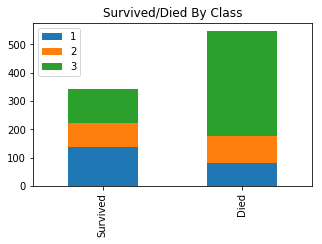

In [83]:
df_class = pd.DataFrame([survived, died])
df_class.index = ['Survived', 'Died']
df_class.plot(kind='bar', figsize=(5, 3), stacked=True, title='Survived/Died By Class')

class1 = df_class.iloc[0,0]/df_class.iloc[:,0].sum()*100
class2 = df_class.iloc[0,1]/df_class.iloc[:,1].sum()*100
class3 = df_class.iloc[0,2]/df_class.iloc[:,2].sum()*100

print("Percentage of Class 1 survived:", round(class1), "%")
print("Percentage of Class 2 survived:", round(class2), "%")
print("Percentage of Class 3 survived:", round(class3), "%")

display(df_class)

,female,male
Survived,233,109
Died,81,468


Percentage of Female Survived: 74.0 %
Percentage of Male Survived: 19.0 %


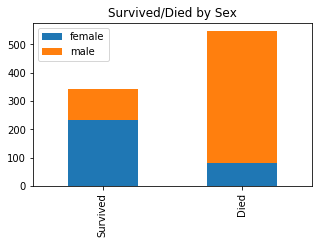

In [84]:
# Sex vs Survived

survived_sex = dataset[dataset['Survived']==1]['Sex'].value_counts()
died_sex = dataset[dataset['Survived']==0]['Sex'].value_counts()

df_sex = pd.DataFrame([survived_sex, died_sex])
df_sex.index = ['Survived', 'Died']
df_sex.plot(kind='bar', stacked=True, figsize=(5,3), title='Survived/Died by Sex')

display(df_sex)

female_survived = df_sex.iloc[0,0]/df_sex.iloc[:,0].sum()*100
male_survived = df_sex.iloc[0,1]/df_sex.iloc[:,1].sum()*100

print("Percentage of Female Survived:", round(female_survived), "%")
print("Percentage of Male Survived:", round(male_survived), "%")

,S,C,Q
Survived,217,93,30
Died,427,75,47


Percentage of S Embark survived: 34.0 %
Percentage of C Embark survived: 55.0 %
Percentage of Q Embark survived: 39.0 %


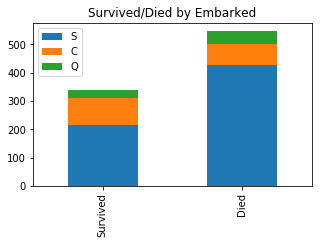

In [85]:
# Embarked vs Survived

survived_embark = dataset[dataset['Survived']==1]['Embarked'].value_counts()
Died_embark = dataset[dataset['Survived']==0]['Embarked'].value_counts()

df_embark = pd.DataFrame([survived_embark, Died_embark])
df_embark.index = ['Survived', "Died"]
df_embark.plot(kind='bar', stacked=True, figsize=(5,3), title='Survived/Died by Embarked')
display(df_embark)

S_survived = df_embark.iloc[0,0]/df_embark.iloc[:,0].sum()*100
C_survived = df_embark.iloc[0,1]/df_embark.iloc[:,1].sum()*100
Q_survived = df_embark.iloc[0,2]/df_embark.iloc[:,2].sum()*100

print("Percentage of S Embark survived:", round(S_survived), "%")
print("Percentage of C Embark survived:", round(C_survived), "%")
print("Percentage of Q Embark survived:", round(Q_survived), "%")

In [86]:
# Data Cleaning and Feature selection

X = dataset.drop(['PassengerId', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin'], axis=1)
X_test = test_data.drop(['PassengerId', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin'], axis=1)
y = dataset['Survived']

X = X.drop(['Survived'], axis=1)

In [87]:
# Feature Engineering

#SEX
label_encode = LabelEncoder()
X.Sex = label_encode.fit_transform(X.Sex)
X_test.Sex = label_encode.fit_transform(X_test.Sex)

In [88]:
#EMBARKED

#First fill the null values in Embarked with the most common type i.e S

row_index = X.Embarked.isnull()
X.loc[row_index, 'Embarked'] = 'S'

Embarked = pd.get_dummies(X.Embarked, prefix='Embarked')
X = X.drop(['Embarked'], axis=1)
X = pd.concat([X, Embarked], axis=1)

X = X.drop(['Embarked_S'], axis=1)

In [89]:
X.head(30)

,Pclass,Name,Sex,Age,Embarked_C,Embarked_Q
0,3,"Braund, Mr. Owen Harris",1,22.0,0,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,0,0
4,3,"Allen, Mr. William Henry",1,35.0,0,0
5,3,"Moran, Mr. James",1,NaN,0,1
6,1,"McCarthy, Mr. Timothy J",1,54.0,0,0
7,3,"Palsson, Master. Gosta Leonard",1,2.0,0,0
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,0
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0


In [90]:
Embarked1 = pd.get_dummies(X_test.Embarked, prefix='Embarked')

X_test = X_test.drop(['Embarked'], axis=1)
X_test = pd.concat([X_test, Embarked1], axis=1)
X_test = X_test.drop(['Embarked_S'], axis=1)
X_test

,Pclass,Name,Sex,Age,Embarked_C,Embarked_Q
0,3,"Kelly, Mr. James",1,34.5,0,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,0,0
2,2,"Myles, Mr. Thomas Francis",1,62.0,0,1
3,3,"Wirz, Mr. Albert",1,27.0,0,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,0,0
5,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0
6,3,"Connolly, Miss. Kate",0,30.0,0,1
7,2,"Caldwell, Mr. Albert Francis",1,26.0,0,0
8,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,1,0
9,3,"Davies, Mr. John Samuel",1,21.0,0,0


In [91]:
# Now we try to fill the null Age fields with the help Name titles

got = dataset.Name.str.split(',').str[1]
X.iloc[:, 1] = pd.DataFrame(got).Name.str.split('\s+').str[1]
X.head()

,Pclass,Name,Sex,Age,Embarked_C,Embarked_Q
0,3,Mr.,1,22.0,0,0
1,1,Mrs.,0,38.0,1,0
2,3,Miss.,0,26.0,0,0
3,1,Mrs.,0,35.0,0,0
4,3,Mr.,1,35.0,0,0


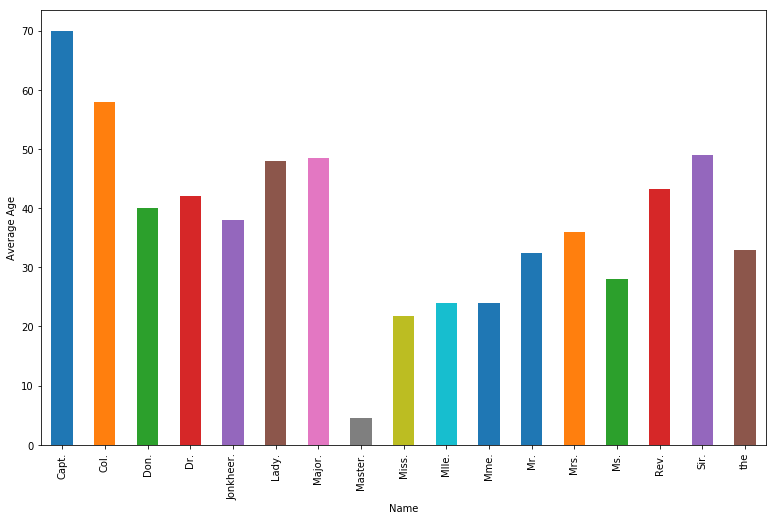

In [92]:
ax = plt.subplot()
ax.set_ylabel('Average Age')
X.groupby('Name').mean()['Age'].plot(kind='bar', figsize=(13, 8), ax=ax)

In [93]:
got1 = test_data.Name.str.split(',').str[1]
X_test.Name = pd.DataFrame(got1).Name.str.split('\s+').str[1]
X_test.head()

,Pclass,Name,Sex,Age,Embarked_C,Embarked_Q
0,3,Mr.,1,34.5,0,1
1,3,Mrs.,0,47.0,0,0
2,2,Mr.,1,62.0,0,1
3,3,Mr.,1,27.0,0,0
4,3,Mrs.,0,22.0,0,0


In [94]:
title_mean_age = []
title_mean_age.append(list(set(X.Name)))
title_mean_age.append(X.groupby('Name').Age.mean())
title_mean_age

[['Dr.',
  'Capt.',
  'Jonkheer.',
  'the',
  'Lady.',
  'Major.',
  'Ms.',
  'Mrs.',
  'Mr.',
  'Col.',
  'Mlle.',
  'Rev.',
  'Miss.',
  'Sir.',
  'Mme.',
  'Don.',
  'Master.'],
 Name
 Capt.        70.000000
 Col.         58.000000
 Don.         40.000000
 Dr.          42.000000
 Jonkheer.    38.000000
 Lady.        48.000000
 Major.       48.500000
 Master.       4.574167
 Miss.        21.773973
 Mlle.        24.000000
 Mme.         24.000000
 Mr.          32.368090
 Mrs.         35.898148
 Ms.          28.000000
 Rev.         43.166667
 Sir.         49.000000
 the          33.000000
 Name: Age, dtype: float64]

In [95]:
# Replace the null age fields with its title mean age
training = dataset.shape[0]
training1 = test_data.shape[0]
titles = len(title_mean_age[1])

for i in range(0, training):
    if np.isnan(X.Age[i]):
        for j in range(0, titles):
            if X.Name[i] == title_mean_age[0][j]:
                X.Age[i] = title_mean_age[1][j]

for i in range(0, training1):
    if np.isnan(X_test.Age[i]):
        for j in range(0, titles):
            if X_test.Name[i] == title_mean_age[0][j]:
                X_test.Age[i] = title_mean_age[1][j]


In [96]:
# Drop the name field

X = X.drop(['Name'], axis=1)
X_test = X_test.drop(['Name'], axis=1)

In [97]:
# we can further alter the age feature such that those whose age is above 18 will be considered as adults otherwise minors

for i in range(0, training):
    if X.Age[i] > 18:
        X.Age[i] = 0
    else:
        X.Age[i] = 1

for i in range(0, training1):
    if X_test.Age[i] > 18:
        X_test.Age[i] = 0
    else:
        X_test.Age[i] = 1

In [98]:
X_test.head(30)

,Pclass,Sex,Age,Embarked_C,Embarked_Q
0,3,1,0.0,0,1
1,3,0,0.0,0,0
2,2,1,0.0,0,1
3,3,1,0.0,0,0
4,3,0,0.0,0,0
5,3,1,1.0,0,0
6,3,0,0.0,0,1
7,2,1,0.0,0,0
8,3,0,1.0,1,0
9,3,1,0.0,0,0


In [99]:
# Now our data is preprocessed, we can now pass it to different Classifiers and see which performs better in creating a model
# of classification for this data.

# Logistic Regression

lc = LogisticRegression(penalty='l2', random_state=0)
acc1 = cross_val_score(estimator=lc, X=X, y=y, cv=10)
print("Logistic Regression:\n Accuracy:", acc1.mean(), '+/-', acc1.std(), '\n')

Logistic Regression:
 Accuracy: 0.7834150493701055 +/- 0.026304984822902028 



In [100]:
lc.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [101]:
sol1 = pd.DataFrame(lc.predict(X_test))
sol1

,0
0,0
1,1
2,0
3,0
4,1
5,0
6,1
7,0
8,1
9,0


In [102]:
# Support Vector Classifier (SVM)

clf = SVC()
acc2 = cross_val_score(estimator=clf, X=X, y=y, cv=10)
clf.fit(X, y)
print("SVC:\n Accuracy:", acc2.mean(), '+/-', acc2.std(), '\n')

SVC:
 Accuracy: 0.7878217568947907 +/- 0.030684614856384105 



In [104]:
sol2 = pd.DataFrame(clf.predict(X_test)) #Predict X_test using SVM Classifier
sol2

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,0
8,1
9,0


In [105]:
# Random Forest Classifier

rfc = RandomForestClassifier(n_estimators=200)
acc3 = cross_val_score(estimator=rfc, X=X, y=y, cv=10)
rfc.fit(X,y)
print("Random Forest:\n Accuracy:", acc3.mean(), '+/-', acc3.std(), '\n')

Random Forest:
 Accuracy: 0.811443366246737 +/- 0.03245900781062205 



In [117]:
sol3 = pd.DataFrame(rfc.predict(X_test), columns=['Survived'])
sol3

,Survived
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,0
8,1
9,0
